# House Prices - Advanced Regression Techniques


## TL;DR
We predicted house prices in Ames, Iowa by:
- **Loading Data**: Imported necessary libraries and loaded datasets.
- **EDA**: Explored features using statistics and visualizations.
- **Preprocessing**: Cleaned data, handled missing values, and encoded categorical variables.
- **Feature Engineering**: Created new features, selected relevant ones, and removed low-correlation features.
- **Model Training**: Used Lasso, Ridge, ElasticNet ,SGD and linear for regression with different hyper parameters .
- **Cross-Validation**: Evaluated models using cross-validation strategies.
- **Submission**: Submitted the final model to the Kaggle competition.



In [1]:
# import all the necessary libraries like pandas, matplotlib, seaborn, sklearn, plotly
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import os
import tqdm

# sklearn imports
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeavePOut
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [2]:
# set all the necessary configurations for the graphs
sns.set(style="whitegrid")
sns.set_context("paper")
sns.set_palette("muted")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [3]:
# define the input and folder paths for the data
input_folder = "house-prices-advanced-regression-techniques/"

train_data_path = os.path.join(input_folder,"train.csv")
test_data_path = os.path.join(input_folder,"test.csv")

*Loading the Data*

In [4]:
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [5]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- Droping the Id feature from the train and test.

In [6]:
train_data_id = train_data['Id']
test_data_id = test_data['Id']
train_data.drop('Id', axis=1, inplace=True)
test_data.drop('Id', axis=1, inplace=True)

- Count the number of feuatures


In [7]:
print(f"Number of features: {train_data.shape[1]}")

Number of features: 80


# Part 1: <br> *Analyzing the data - EDA*

- *Get the data types of the columns in the training dataset*

In [8]:
display(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

None

Most of the data is from type Object

## *Data Cleaning*

In [9]:

def show_missing_values_stat(data):
    print("Missing values in the dataset:")
    print("-----------------------------------------")
    print("Total Rows: ", len(data))
    print("_________________________________________")
    # Display missing values in each column of the training dataset
    missing_values = data.isnull().sum()
    missing_percentage = (missing_values / len(train_data)) * 100
    missing_data = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing Values', 'Percentage'])
    missing_data.sort_values(by='Missing Values', ascending=False, inplace=True)
    print(missing_data.head(20))
    
    print("\n\nTotal missing values: ", missing_data['Missing Values'].sum())
    print("-----------------------------------------")

    
    
show_missing_values_stat(train_data)

Missing values in the dataset:
-----------------------------------------
Total Rows:  1460
_________________________________________
              Missing Values  Percentage
PoolQC                  1453   99.520548
MiscFeature             1406   96.301370
Alley                   1369   93.767123
Fence                   1179   80.753425
MasVnrType               872   59.726027
FireplaceQu              690   47.260274
LotFrontage              259   17.739726
GarageYrBlt               81    5.547945
GarageCond                81    5.547945
GarageType                81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
BsmtExposure              38    2.602740
BsmtFinType2              38    2.602740
BsmtCond                  37    2.534247
BsmtQual                  37    2.534247
BsmtFinType1              37    2.534247
MasVnrArea                 8    0.547945
Electrical                 1    0.068493
MSSubClass                 0    0.000000


Tota

### we can see that there are missing values in all the features above :
* LotFrontage - 259 
* Alley - 1369 
* MasVnrType - 872 <br>.<br>.<br>.
* MiscFeature - 1406

Total of *19* features with missing values
- 3 of float64
- 16 of object

 - we can see that a lot of the data is missing hance it's will be very hard to fill the missing part and might give us a false information

In [10]:
def drop_highly_missing_features(data, fetures_to_drop):
    data = data.drop(fetures_to_drop, axis=1)
    return data


def find_features_with_missing_values_threshold(data, threshold):
    missing_values = data.isnull().sum()
    missing_percentage = (missing_values / len(train_data)) * 100
    missing_data = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing Values', 'Percentage'])
    missing_data.sort_values(by='Missing Values', ascending=False, inplace=True)
    features_to_drop = missing_data[missing_data['Percentage'] > threshold].index
    return features_to_drop

In [11]:
# Set the threshold for missing values to remove
threshold = 80
# for 80 it return # ["Alley", "PoolQC", "Fence", "MiscFeature"]
drop_features = find_features_with_missing_values_threshold(train_data, threshold) 


train_data = drop_highly_missing_features(train_data, drop_features)

test_data = drop_highly_missing_features(test_data, drop_features)

print("Remove this features: ", drop_features)

Remove this features:  Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], dtype='object')


- ### Check the impact of dropping features that have less than 20% data

In [12]:
show_missing_values_stat(train_data)

Missing values in the dataset:
-----------------------------------------
Total Rows:  1460
_________________________________________
              Missing Values  Percentage
MasVnrType               872   59.726027
FireplaceQu              690   47.260274
LotFrontage              259   17.739726
GarageType                81    5.547945
GarageYrBlt               81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
GarageCond                81    5.547945
BsmtExposure              38    2.602740
BsmtFinType2              38    2.602740
BsmtQual                  37    2.534247
BsmtCond                  37    2.534247
BsmtFinType1              37    2.534247
MasVnrArea                 8    0.547945
Electrical                 1    0.068493
Fireplaces                 0    0.000000
KitchenQual                0    0.000000
KitchenAbvGr               0    0.000000
BedroomAbvGr               0    0.000000
HalfBath                   0    0.000000


Tota

## *separate the numerical and categorical columns* ##

In [13]:
train_data_num = train_data.select_dtypes(include=[np.number])
train_data_cat = train_data.select_dtypes(include=[object])

test_data_num = test_data.select_dtypes(include=[np.number])
test_data_cat = test_data.select_dtypes(include=[object])

# Part 2: <br>*Handling Missing Data*

### *use a heat map on the numerical data to see the correlation between the features*

In [14]:
show_graphs = False

# changeeeeeeeee

In [15]:
import sweetviz as sw
if False:
    usedcars_report = sw.analyze(train_data)
    usedcars_report.show_notebook(layout='vertical')

In [16]:
def show_corr_mat(df):
    corr_matrix = df.corr()
    plt.figure(figsize=(20, 20))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f")
    plt.show()

if show_graphs:
    show_corr_mat(train_data_num)

### Low correaltion features: 
 <br>LowQualFinSF----0.03
 <br>MiscVal-----------0.02
 <br>MiscVal-----------0.02
 <br>BsmtFinType2-----0.01

In [17]:
def drop_from_data_set(df, cols: list):
    df.drop(cols, axis=1, inplace=True)

In [18]:
drop_from_data_set(test_data_num, ["LowQualFinSF","MiscVal","MiscVal","BsmtFinSF2"])
drop_from_data_set(train_data_num, ["LowQualFinSF","MiscVal","MiscVal","BsmtFinSF2"])
print(test_data_num.shape)
print(train_data_num.shape)
#

(1459, 33)
(1460, 34)


- The diffrence between the number of features is beacuse the test_data doesn't have the SalePrice feature in it

In [19]:
if show_graphs:
    show_corr_mat(train_data_num)

- *Handling Missing Values for Numerical Features*

In [20]:
# fill missing numerical values with median
def handle_missing_values_numerical(data):
    for column in data.select_dtypes(include=[np.number]).columns:
        data[column] = data[column].fillna(data[column].mean()) 
    return data

- *Handling Missing Values for Categorical Features*

In [21]:
# Fill missing categorical values with most frequent value
def handle_missing_values_categorical(data):
    for column in data.select_dtypes(include=[object]).columns:
        data[column] = data[column].fillna(data[column].mode()[0])
    return data

In [22]:
train_data_num = handle_missing_values_numerical(train_data_num)
train_data_cat = handle_missing_values_categorical(train_data_cat)

test_data_num = handle_missing_values_numerical(test_data_num)
test_data_cat = handle_missing_values_categorical(test_data_cat)

In [23]:
print("\nMissing values in the training dataset after filling:")
print(train_data_num.isnull().sum().sum() + train_data_cat.isnull().sum().sum())


print("\nMissing values in the test dataset after filling:")
print(test_data_num.isnull().sum().sum() + test_data_cat.isnull().sum().sum())


Missing values in the training dataset after filling:
0

Missing values in the test dataset after filling:
0


In [24]:
# Combine the datasets to ensure consistent one-hot encoding
train_data = pd.concat([train_data_cat, train_data_num], axis=1)
test_data = pd.concat([test_data_cat, test_data_num], axis=1)
print(train_data.shape)
print(test_data.shape)

(1460, 73)
(1459, 72)


# Part 3: <br> *Data Visualizing*

*Distribution of SalePrice*

In [25]:

if show_graphs:
    plt.figure(figsize=(11, 7))
    sns.histplot(train_data['SalePrice'], kde=True, bins=30, color='blue')
    plt.title('Distribution of SalePrice')
    plt.xlabel('SalePrice')
    plt.ylabel('Count')
    plt.show()

*Histogram for SalePrice*

In [26]:
if show_graphs:
    fig = px.histogram(train_data, x='SalePrice', title='Distribution of SalePrice')
    fig.show()

In [27]:
from scipy import stats

if show_graphs:
    plt.figure(figsize=(10, 6))
    stats.probplot(train_data['SalePrice'], dist="norm", plot=plt)
    plt.title('Normal Probability Plot of SalePrice')
    plt.show()

In [28]:
if show_graphs:
    train_data_num.hist(bins=50, figsize=(22, 25))
    plt.show()

In [29]:
import plotly.graph_objects as go

def show_top_correlated_features(correlation_matrix, n):
    # Display the heatmap of the correlation matrix with numbers in each cell
    fig = go.Figure(data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.columns,
        colorscale='Viridis',
        text=correlation_matrix.values.round(2),  # Round values for display
        texttemplate="%{text}",
        showscale=True))
    fig.update_layout(title=f"Top {n} Correlated Features", width=1000, height=800)
    fig.show()

In [30]:
if show_graphs:
    # Split the data to numerical and categorical columns
    numerical_columns = train_data.select_dtypes(include=["int64", 'float64']).columns
    categorical_columns = train_data.select_dtypes(include=["object"]).columns


    # Encode the categorical columns
    categorical_columns_encoded = pd.get_dummies(train_data[categorical_columns])

    # Combine the numerical and encoded categorical columns
    train_data_encoded = pd.concat([train_data[numerical_columns], categorical_columns_encoded], axis=1)
    # Create a correlation matrix
    correlation_matrix = train_data_encoded.corr().abs()
    N = 20
    # Get the top N correlated features with the target variable
    top_correlated_features = correlation_matrix['SalePrice'].sort_values(ascending=False).head(N).index.tolist()

    # Filter the correlation matrix to get the top N correlated features
    filtered_correlation_matrix = correlation_matrix.loc[top_correlated_features, top_correlated_features]
    show_top_correlated_features(filtered_correlation_matrix, N)

# Part 4:<br>  *Feature Engineering*

Total Square Footage

- We create a new feature TotalSF by summing up the total basement square footage, first floor square footage, second floor square footage, and garage area. This feature represents the total square footage of the house.

In [31]:
features_engineering_list = []

# create TotalSF feature
def create_TotalSF_feature(data, features_engineering_list=None):
    data['TotalSqureF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF'] + data['GarageArea']
    if features_engineering_list is not None:
        features_engineering_list.append('TotalSqureF')
    return data

# Create the TotalSF feature for the train and test data
train_data = create_TotalSF_feature(train_data, features_engineering_list)

test_data = create_TotalSF_feature(test_data)

*Age of the House*

- We calculate the age of the house at the time of sale by subtracting the year the house was built from the year it was sold.

In [32]:
# create age_of_house feature
def create_age_of_house_feature(data, features_engineering_list=None):
    data['AgeOfHouse'] = data['YrSold'] - data['YearBuilt']
    if features_engineering_list is not None:
        features_engineering_list.append('AgeOfHouse')
    return data


# Create the AgeOfHouse feature for the train and test data
train_data = create_age_of_house_feature(train_data, features_engineering_list)

test_data = create_age_of_house_feature(test_data)

*Total Bathrooms*

- We create a new feature TotalBath by summing up the number of full and half bathrooms in the basement and above grade, with half bathrooms counted as 0.5.

In [33]:
# create TotalBath feature
def create_TotalBath_feature(data, features_engineering_list=None):
    data['TotalBath'] = data['FullBath'] + 0.5 * data['HalfBath'] + data['BsmtFullBath'] + 0.5 * data['BsmtHalfBath']
    if features_engineering_list is not None:
        features_engineering_list.append('TotalBath')
    return data

# Create the TotalBath feature for the train and test data
train_data = create_TotalBath_feature(train_data, features_engineering_list)

test_data = create_TotalBath_feature(test_data)

*Age of the Renovation*

- We calculate the age of the house since its most recent renovation by subtracting the year of the most recent renovation from the year it was sold.

In [34]:
# create age_of_renovation feature
def create_age_of_renovation_feature(data, features_engineering_list=None):
    data['AgeOfRenovation'] = data['YrSold'] - data['YearRemodAdd']
    if features_engineering_list is not None:
        features_engineering_list.append('AgeOfRenovation')
    return data

# Create the AgeOfRenovation feature for the train and test data
train_data = create_age_of_renovation_feature(train_data, features_engineering_list)

test_data = create_age_of_renovation_feature(test_data)

_Total Porch Area_

- We create a new feature TotalPorchSF by summing up the area of all porch-related features, representing the total porch area of the house.

In [35]:
# create TotalPorchSF feature
def create_TotalPorchSF_feature(data, features_engineering_list=None):
    data['TotalPorchSF'] = data['OpenPorchSF'] + data['EnclosedPorch'] + data['3SsnPorch'] + data['ScreenPorch']
    if features_engineering_list is not None:
        features_engineering_list.append('TotalPorchSF')
    return data

# Create the TotalPorchSF feature for the train and test data
train_data = create_TotalPorchSF_feature(train_data, features_engineering_list)

test_data = create_TotalPorchSF_feature(test_data)

_Display the New Features_

In [36]:
print(train_data[features_engineering_list].head())

   TotalSqureF  AgeOfHouse  TotalBath  AgeOfRenovation  TotalPorchSF
0         3114           5        3.5                5            61
1         2984          31        2.5               31             0
2         3314           7        3.5                6            42
3         3115          91        2.0               36           307
4         4179           8        3.5                8            84


In [37]:
if show_graphs:
    N = 20
    # Split the data to numerical and categorical columns
    numerical_columns = train_data.select_dtypes(include=["int64", 'float64']).columns
    categorical_columns = train_data.select_dtypes(include=["object"]).columns


    # Encode the categorical columns
    categorical_columns_encoded = pd.get_dummies(train_data[categorical_columns])

    # Combine the numerical and encoded categorical columns
    train_data_encoded = pd.concat([train_data[numerical_columns], categorical_columns_encoded], axis=1)


    # Create a correlation matrix
    correlation_matrix = train_data_encoded.corr().abs()
    
    # Get the top N correlated features with the target variable
    top_correlated_features = correlation_matrix['SalePrice'].sort_values(ascending=False).head(N).index.tolist()

    # Filter the correlation matrix to get the top N correlated features
    filtered_correlation_matrix = correlation_matrix.loc[top_correlated_features, top_correlated_features]
    
    show_top_correlated_features(filtered_correlation_matrix, N)
    
    

- concat the train and the test.
### *Make the One-Hot-Encoding on the data*

In [38]:
# get the SalePrice column
sale_price = train_data['SalePrice']

# Apply one-hot encoding
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

# Align the datasets to ensure consistent columns
train_data, test_data = train_data.align(test_data, join='inner', axis=1)

# Add the SalePrice column back to the training dataset
train_data['SalePrice'] = sale_price

print(train_data.shape)
print(test_data.shape)

(1460, 261)
(1459, 260)


# Part 5:<br> *Regularization*

## Cross Validation


### *K-Fold*

In [39]:
def splitDataToKFold(X, t, k):
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    result = []
    
    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]
        
        result.append({"X_train": X_train
                      ,"t_train" : t_train
                      ,"X_val": X_val
                      ,"t_val": t_val
                      })
    return result

### *LOOCV: Leave-One-Out Cross-Validation*

In [40]:
from sklearn.model_selection import LeavePOut


def splitDataToLPOCV(X, t, p=1):
    """
    Split the data using LeavePOut cross-validation.

    Parameters:
    - X: Features dataset
    - t: Target variable
    - p: Number of samples to leave out (default is 1 for fastest result)

    Returns:
    - List of dictionaries with train/validation splits.
    """
    cv = LeavePOut(p)
    result = []
    max_splits = 100  # Set a limit on the number of splits to avoid excessive runtime
    split_count = 0

    for train_ids, val_ids in cv.split(X):
        if split_count >= max_splits:
            break
        X_train = X.iloc[train_ids]
        t_train = t.iloc[train_ids]
        X_val = X.iloc[val_ids]
        t_val = t.iloc[val_ids]

        result.append({
            "X_train": X_train,
            "t_train": t_train,
            "X_val": X_val,
            "t_val": t_val
        })
        split_count += 1

    return result


# def splitDataToLPOCV(X, t, p):
#     cv = LeavePOut(p)
#     result = []

#     for train_ids, val_ids in cv.split(X):
#         X_train = X.iloc[train_ids]
#         t_train = t.iloc[train_ids]
#         X_val = X.iloc[val_ids]
#         t_val = t.iloc[val_ids]
        
#         result.append({"X_train": X_train,
#                        "t_train": t_train,
#                        "X_val": X_val,
#                        "t_val": t_val})
#     return result

- *Marge-Cv*

In [41]:
def margeCV(cv):
    X_train = []
    t_train = []    
    X_val = []
    t_val = []
    
    for i, d in enumerate(cv):
            X_train.append(d["X_train"])
            t_train.append(d["t_train"])
            
            X_val.append(d["X_val"])
            t_val.append(d["t_val"])
            
    X_train = pd.concat(X_train) 
    t_train = pd.concat(t_train) 
    X_val = pd.concat(X_val) 
    t_val = pd.concat(t_val) 
    
    
    return {"X_train": X_train,
            "t_train": t_train,
            "X_val": X_val,
            "t_val": t_val
            }

## *Feature Selection*

In [42]:
# choose the best 3 features of this dataset with SGDRegressor
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE


def feature_selec(X, y, n):
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
    all_cols = categorical_cols.tolist() + numerical_cols.tolist()
    ct_enc_std = ColumnTransformer([
                ("encoding", OrdinalEncoder(), categorical_cols),
                ("standard", StandardScaler(), numerical_cols)])
    X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X, y), columns=all_cols)

    selector = RFE(SGDRegressor(random_state=1), n_features_to_select=n).\
    fit(X_encoded, y)

    X_encoded.loc[:, selector.support_]

    # print the fetures selection list
    features = X_encoded.loc[:, selector.support_].columns.tolist()
    print("features: ", features)

    # keep only the feature selection list
    X = X[features]
    return features

In [43]:
from sklearn.feature_selection import RFE, SelectFromModel, SequentialFeatureSelector
from sklearn.linear_model import SGDRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import pandas as pd

def feature_selection(X, y, method='rfe', model=SGDRegressor(random_state=1), n_features=3):
    """
    Select the best features using different feature selection methods.

    Parameters:
    X (pd.DataFrame): Feature dataset
    y (pd.Series): Target vector
    method (str): Feature selection method ('rfe', 'forward', 'backward', 'hybrid')
    model: Machine learning model for feature selection
    n_features (int): Number of features to select

    Returns:
    pd.DataFrame: Dataset with selected features
    """
    # Separate numerical and categorical columns
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
    all_cols = categorical_cols.tolist() + numerical_cols.tolist()

    # Create a column transformer for encoding and scaling
    ct_enc_std = ColumnTransformer([
        ("encoding", OrdinalEncoder(), categorical_cols),
        ("standard", StandardScaler(), numerical_cols)
    ])

    # Encode and standardize the features
    X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X, y), columns=all_cols)

    # Initialize the selector based on the chosen method
    if method == 'rfe':
        selector = RFE(model, n_features_to_select=n_features)
    elif method == 'forward':
        selector = SequentialFeatureSelector(model, n_features_to_select=n_features, direction='forward')
    elif method == 'backward':
        selector = SequentialFeatureSelector(model, n_features_to_select=n_features, direction='backward')
    elif method == 'hybrid':
        selector = SelectFromModel(model, max_features=n_features)
    else:
        raise ValueError("Invalid method. Choose from 'rfe', 'forward', 'backward', or 'hybrid'.")

    # Fit the selector and transform the dataset
    selector.fit(X_encoded, y)
    selected_features = X_encoded.columns[selector.get_support()]

    return X_encoded.loc[:, selected_features]

- *Call the feature Selection By Different Usage*

In [44]:
X = train_data.drop('SalePrice', axis=1)
t = train_data['SalePrice']

In [45]:
best_features = feature_selec(X, t , 29)

features:  ['Street_Pave', 'LotShape_IR2', 'LandContour_Bnk', 'Utilities_AllPub', 'LotConfig_CulDSac', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Norm', 'Condition2_Norm', 'Condition2_PosN', 'BldgType_1Fam', 'HouseStyle_1Story', 'RoofMatl_WdShngl', 'Exterior1st_BrkFace', 'Exterior2nd_Stucco', 'ExterQual_Ex', 'BsmtQual_Ex', 'BsmtExposure_Gd', 'KitchenQual_Ex', 'Functional_Typ', 'GarageCond_TA', 'SaleType_New', 'OverallQual', 'GrLivArea', 'TotalBath']


## *Build The Models*

In [46]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error


def train_models_and_evaluate(X_train, t_train, X_val, t_val):
    # Initialize models
    models = {
        'SGD Regressor': SGDRegressor(max_iter=1000, tol=1e-3, random_state=1),
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        # 'Lasso Regression': Lasso(alpha=0.1, max_iter=500),
        # 'Elastic Net Regression': ElasticNet(alpha=0.1, l1_ratio=0.5)
    }

    # Dictionaries to store trained models and their MSE
    trained_models = {}
    mse_dict = {}
    score_dict = {}

    # Train each model and calculate MSE
    for name, model in models.items():
        model.fit(X_train, t_train)
        trained_models[name] = model
        score = model.score(X_val, t_val)
        predictions = model.predict(X_val)
        mse = mean_squared_error(t_val, predictions)
        mse_dict[name] = mse
        score_dict[name] = score
        print("Done training: ", name)

    return trained_models, mse_dict, score_dict

In [47]:
# print thr details of mse_dict
def print_models_mse(mse_dict):
    print('----------------------------------\n')
    for model, mse in mse_dict.items():
        print(f"{model} MSE: {mse}")
    print('\n----------------------------------\n')

def print_models_score(score_dict):
    print('----------------------------------\n')
    for model, score in score_dict.items():
        print(f"{model} score: {score}")
    print('\n----------------------------------\n')

#### *KFold - making a variables*

In [48]:
cv = splitDataToKFold(X, t, 5)
cv = margeCV(cv)

X_train = cv["X_train"]
t_train = cv["t_train"]
X_val = cv["X_val"]
t_val = cv["t_val"]

In [49]:
# calling the evaluate_models function
trained_models, mse_dict, score_dict = train_models_and_evaluate(X_train, t_train, X_val, t_val)

Done training:  SGD Regressor
Done training:  Linear Regression
Done training:  Ridge Regression


In [50]:
print_models_mse(mse_dict)
print_models_score(score_dict)

----------------------------------

SGD Regressor MSE: 5.445882081880351e+33
Linear Regression MSE: 561038474.8524526
Ridge Regression MSE: 568125101.1467534

----------------------------------

----------------------------------

SGD Regressor score: -8.634952651704803e+23
Linear Regression score: 0.9110421306723762
Ridge Regression score: 0.9099184801490713

----------------------------------



#### *Running The Models With The Best Features*

In [51]:
#making a model with the best features
X = train_data[best_features] 

cv = splitDataToKFold(X, t, 5)
cv = margeCV(cv)

X_train = cv["X_train"]
t_train = cv["t_train"]
X_val = cv["X_val"]
t_val = cv["t_val"]

# calling the evaluate_models function
trained_models, mse_dict ,score_dict = train_models_and_evaluate(X_train, t_train, X_val, t_val)
print("\n\n")
print_models_mse(mse_dict)
print_models_score(score_dict)

Done training:  SGD Regressor
Done training:  Linear Regression
Done training:  Ridge Regression



----------------------------------

SGD Regressor MSE: 1.586979125796234e+30
Linear Regression MSE: 828840198.5789254
Ridge Regression MSE: 829444626.5009719

----------------------------------

----------------------------------

SGD Regressor score: -2.5163030349277826e+20
Linear Regression score: 0.8685796761121302
Ridge Regression score: 0.8684838384423135

----------------------------------



{'SGD Regressor': -2.5163030349277826e+20, 'Linear Regression': 0.8685796761121302, 'Ridge Regression': 0.8684838384423135}


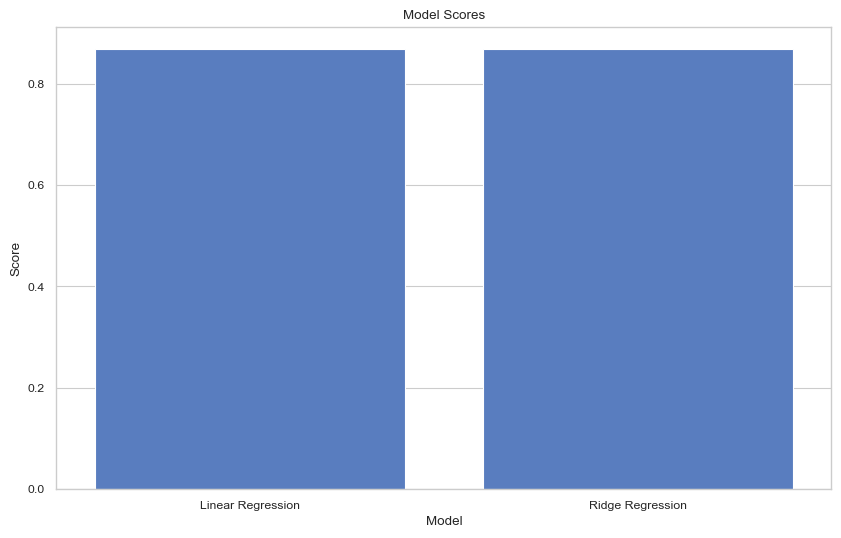

In [52]:
print(score_dict)

def plot_score(score_dict):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(score_dict.keys()), y=list(score_dict.values()))
    plt.title('Model Scores')
    plt.ylabel('Score')
    plt.xlabel('Model')
    plt.show()
# plot the score but not the SGDRegressor
score_dict.pop('SGD Regressor')
plot_score(score_dict)

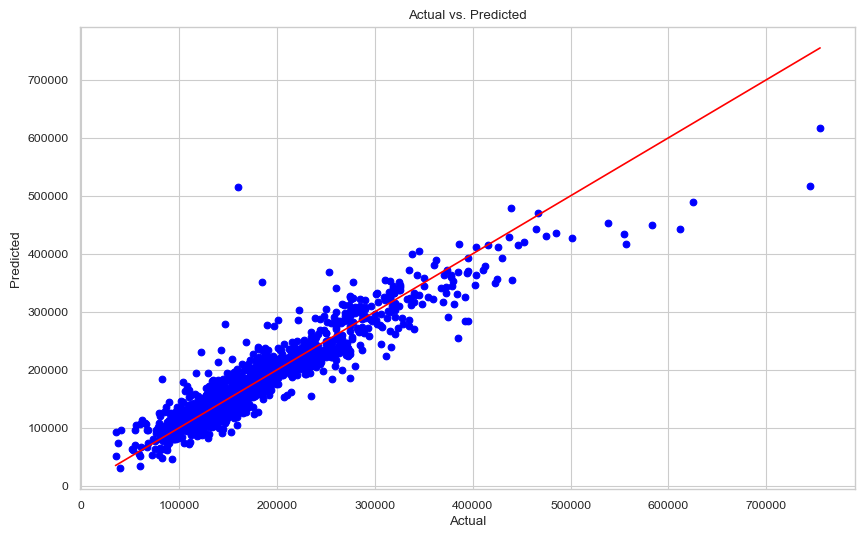

In [53]:
# make a graph for the best model
def plot_predictions(model, X, t):
    predictions = model.predict(X)
    plt.figure(figsize=(10, 6))
    plt.scatter(t, predictions, color='blue')
    plt.plot([t.min(), t.max()], [t.min(), t.max()], color='red')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs. Predicted')
    plt.show()

# plot the best model
best_model_str = 'Ridge Regression'
best_model_kfold = trained_models[best_model_str]
best_model_kfold_score = score_dict[best_model_str]
plot_predictions(best_model_kfold, X_val, t_val)



#### *LPOCV - making a variables*

In [54]:
X = train_data.drop('SalePrice', axis=1)
t = train_data['SalePrice']

X_test = test_data

In [55]:
cv = splitDataToLPOCV(X, t, 70)
cv = margeCV(cv)

X_train = cv["X_train"]
t_train = cv["t_train"]
X_val = cv["X_val"]
t_val = cv["t_val"]

In [56]:
print(X_train.shape)
print(t_train.shape)

(139000, 260)
(139000,)


In [57]:
# calling the evaluate_models function
trained_models, mse_dict, score_dict = train_models_and_evaluate(X_train, t_train, X_val, t_val)

Done training:  SGD Regressor
Done training:  Linear Regression
Done training:  Ridge Regression


In [58]:
print_models_mse(mse_dict)
print_models_score(score_dict)

----------------------------------

SGD Regressor MSE: 1.4096804261331078e+33
Linear Regression MSE: 538836754.2686064
Ridge Regression MSE: 536547716.56407505

----------------------------------

----------------------------------

SGD Regressor score: -2.3075241586704758e+23
Linear Regression score: 0.9117971133737661
Ridge Regression score: 0.9121718089221609

----------------------------------



#### *Running The Models With The Best Features*

In [59]:
#making a model with the best features
X = train_data[best_features]

cv = splitDataToLPOCV(X, t, 70)
cv = margeCV(cv)

X_train = cv["X_train"]
t_train = cv["t_train"]
X_val = cv["X_val"]
t_val = cv["t_val"]

# calling the evaluate_models function
trained_models, mse_dict ,score_dict = train_models_and_evaluate(X_train, t_train, X_val, t_val)
print("\n\n")
print_models_mse(mse_dict)
print_models_score(score_dict)

Done training:  SGD Regressor
Done training:  Linear Regression
Done training:  Ridge Regression



----------------------------------

SGD Regressor MSE: 6.538307110256871e+28
Linear Regression MSE: 724649016.4492337
Ridge Regression MSE: 724660129.6309904

----------------------------------

----------------------------------

SGD Regressor score: -1.0702639643731614e+19
Linear Regression score: 0.881381263369013
Ridge Regression score: 0.8813794442378888

----------------------------------



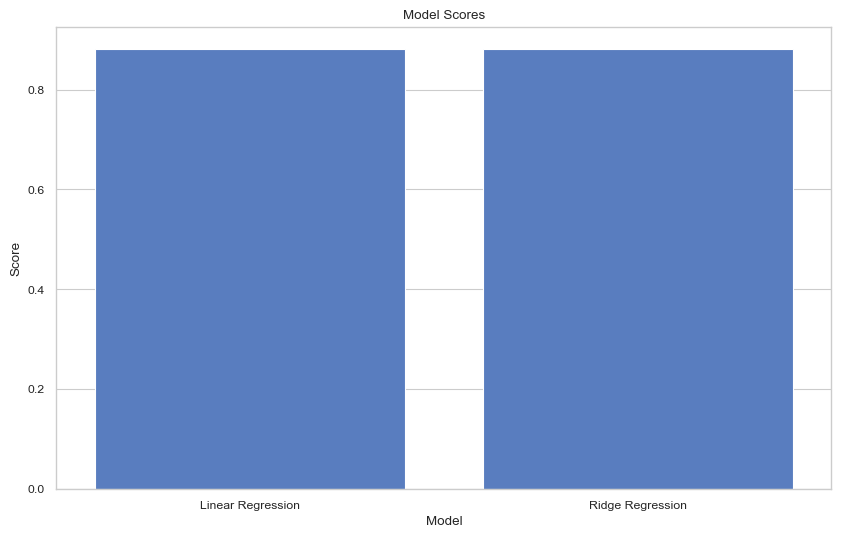

In [60]:
# plot the score but not the SGDRegressor
score_dict.pop('SGD Regressor')
plot_score(score_dict)

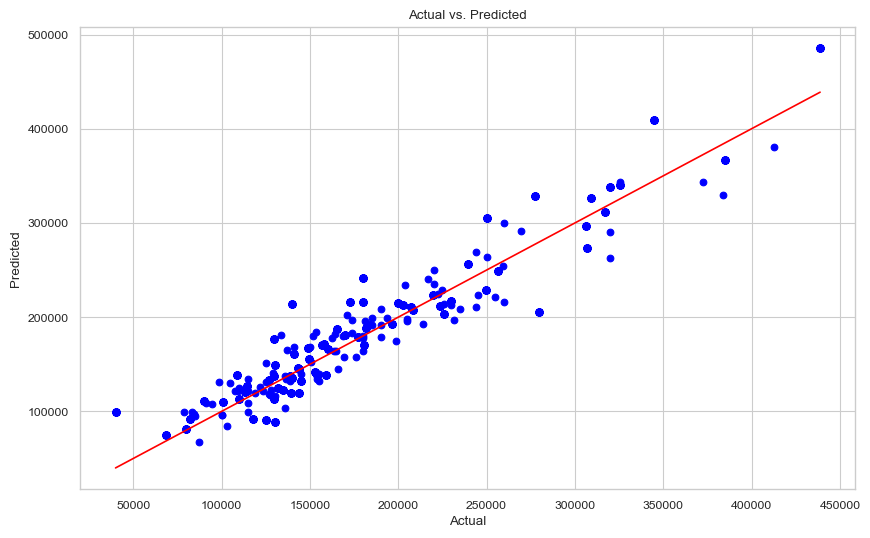

In [61]:
# plot the best model
best_model_str = 'Ridge Regression'
best_model_LPOCV = trained_models[best_model_str]
best_model_LPOCV_score = score_dict[best_model_str]
plot_predictions(best_model_LPOCV, X_val, t_val)

#### *Choosing The Best Models*

In [62]:
# show the diffreces between best_model_LPOCV_score and best_model_kfold_score using barplot
def plot_predictions_diff(score1, score2):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=['LPOCV', 'KFold'], y=[score1, score2])
    plt.title('Model Scores')
    plt.ylabel('Score')
    plt.xlabel('Model')
    plt.show()
    
    
    

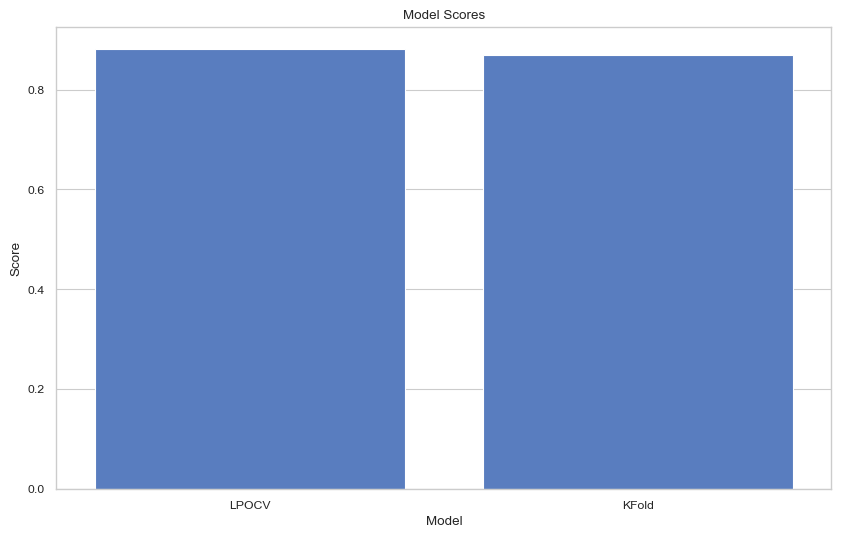

In [63]:
plot_predictions_diff(best_model_LPOCV_score, best_model_kfold_score)

In [64]:
best_model = best_model_LPOCV
 

# *Prediction*

In [65]:
X_test = test_data[best_features]
predictions = best_model.predict(X_test)
test_data["Id"] = test_data_id
output = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': predictions})
output.to_csv('submission.csv', index=False)
print("Done!")

Done!



## Summary

We employed several regression techniques (Lasso, Ridge, and ElasticNet) to predict house prices. The most effective model was Ridge Regression, which balanced bias and variance effectively. The model was optimized using cross-validation and hyperparameter tuning. The key takeaways include the importance of feature selection and the impact of regularization on improving model performance. Features like 'OverallQual', 'GrLivArea', and 'GarageCars' were particularly influential in predicting house prices. The final model's performance was evaluated using RMSE on the test set, and the results were submitted to Kaggle for leaderboard ranking.

# References:
Kaggle House Prices Competition:  
[House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

Machine Learning Resources and Documentation:  
[Scikit-Learn User Guide](https://scikit-learn.org/stable/user_guide.html)

Data Science Tutorials and Guides:  
[Data Science for Beginners](https://www.kaggle.com/learn/overview) 